## Pickle ( or csv) and plot

In [1]:
import pandas as pd
macdf = pd.read_csv('../saved_results/csvmac.csv')
macdf


,Neurons,Execution time,Prediction time,By image
0,5,7.45,0.22,0.0000
1,10,8.20,0.23,0.0000
2,50,10.04,0.22,0.0000
3,128,11.75,0.31,0.0000
4,256,15.16,0.31,0.0000
5,512,27.65,0.41,0.0000
6,1024,97.07,0.95,0.0001
7,2048,226.61,4.07,0.0004
8,4096,518.31,3.22,0.0003


In [2]:
def pi_df(name):
    pidf = pd.read_csv('../saved_results/' + name)
    neurons = []
    pi_times = []
    for i in pidf.values.tolist():
        neurons.append(i[0])
        pi_times.append(i[1])
    return pi_times, neurons

def mac_df(name):
    macdf = pd.read_csv('../saved_results/' + name)
    mac_times = []
    for i in macdf.values.tolist():
        mac_times.append(i[1])
    return mac_times

def frodo_df(name):
    frododf = pd.read_csv('../saved_results/' + name)
    frodo_times = []
    for i in frododf.values.tolist():
        frodo_times.append(i[1])
    return frodo_times

In [22]:
pidf2 = pd.read_csv('../saved_results/pi2.csv')
times_pi2 = []
for i in pidf2.values.tolist():
    times_pi2.append(i[1])
times_pi2

pi_neurons2 = []
for i in pidf2.values.tolist():
    pi_neurons2.append(i[0])
pi_neurons2

[5.0,
 10.0,
 50.0,
 128.0,
 256.0,
 512.0,
 1024.0,
 1500.0,
 2048.0,
 2500.0,
 3000.0,
 3250.0,
 3500.0,
 3750.0,
 4096.0,
 4500.0]

## Animation

In [23]:
pi_times2, neurons2 = pi_df('pi2.csv')
frodo_times2 = frodo_df('frodo2.csv')

MovieWriter imagemagick unavailable; using Pillow instead.


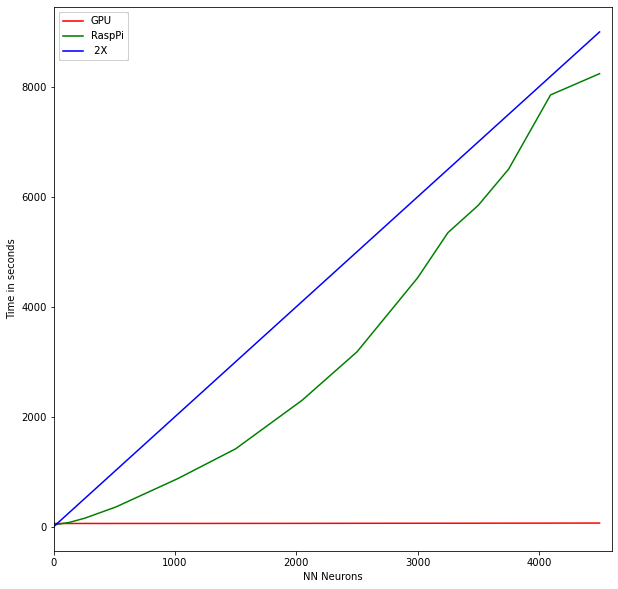

In [27]:
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np

y = [2*x for x in neurons2]

fig = plt.figure(figsize=(10,10))
camera = Camera(fig)
plt.xlim(0, neurons2[-1] + 100)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.plot(neurons2[3], frodo_times2[3], 'r', label = 'GPU')
plt.plot(neurons2[3], pi_times2[3], 'g', label = 'RaspPi')
plt.plot(neurons2[3], y[3], 'b', label= ' 2X ')
plt.legend()
for i in range(4,len(frodo_times2) + 1):
    plt.plot(neurons2[:i], frodo_times2[:i], 'r')#, label = 'GPU')
    plt.plot(neurons2[:i], pi_times2[:i], 'g')#, label = 'RaspPi')
    plt.plot(neurons2[:i], y[:i], 'b')
    camera.snap()
animation = camera.animate(interval = 500)
animation.save('../saved_results/timecomparison.gif', writer = 'imagemagick')

## Old data

In [3]:
pi_times, neurons = pi_df('pi.csv')
mac_times = mac_df('csvmac.csv')
frodo_times = frodo_df('csvfrodo.csv')

pi_times2, neurons2 = pi_df('pi2.csv')
frodo_times2 = frodo_df('frodo2.csv')
frodo_times3 = frodo_df('frodo3.csv')


MovieWriter imagemagick unavailable; using Pillow instead.


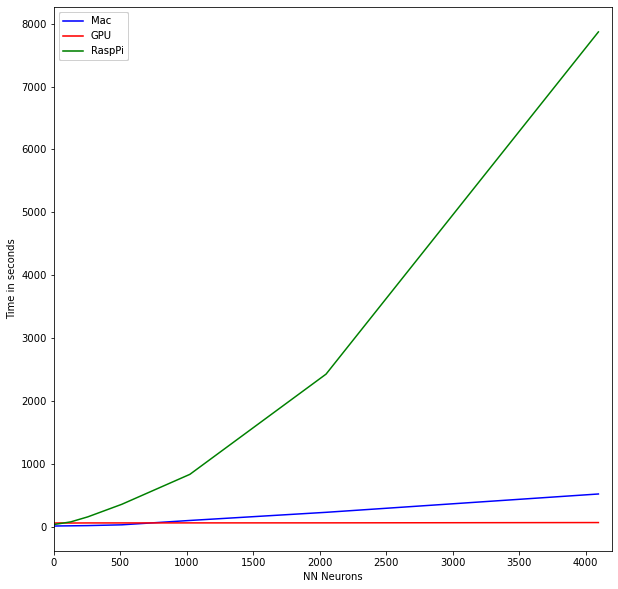

In [4]:
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np

fig = plt.figure(figsize=(10,10))
camera = Camera(fig)

plt.xlim(0,neurons[-1]+100)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.plot(neurons[3], mac_times[3], 'b', label = 'Mac')
plt.plot(neurons[3], frodo_times[3], 'r', label = 'GPU')
plt.plot(neurons[3], pi_times[3], 'g', label = 'RaspPi')
plt.legend()
for i in range(4,len(neurons)+1):
    plt.plot(neurons[:i], mac_times[:i], 'b')#, label = 'Mac')
    plt.plot(neurons[:i], frodo_times[:i], 'r')#, label = 'GPU')
    plt.plot(neurons[:i], pi_times[:i], 'g')#, label = 'RaspPi')
    camera.snap()
animation = camera.animate(interval = 1000)
animation.save('../saved_results/timecomparison2.gif', writer = 'imagemagick')

In [13]:
ticks = [i for i in range (0,100,10)]
ticks

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [16]:
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np

fig = plt.figure(figsize=(10,10))
camera = Camera(fig)

plt.ylim(0, 80)
plt.xlim(0,neurons[-1]+100)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.yticks(ticks)
plt.plot(neurons2[3], frodo_times2[3], 'y', label = '1 GPU')
plt.plot(neurons2[3], frodo_times3[3], 'r', label = '3 GPU')
#plt.plot(neurons2[3], pi_times2[3], 'g', label = 'RaspPi')
plt.legend()
for i in range(4,len(neurons2)+1):
    plt.yticks(ticks)
    plt.plot(neurons2[:i], frodo_times2[:i], 'y')#, label = 'Mac')
    plt.plot(neurons2[:i], frodo_times3[:i], 'r')#, label = 'GPU')
    #plt.plot(neurons2[:i], pi_times2[:i], 'g')#, label = 'RaspPi')
    camera.snap()
animation = camera.animate(interval = 700)
animation.save('../saved_results/frodocomparison.gif', writer = 'imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


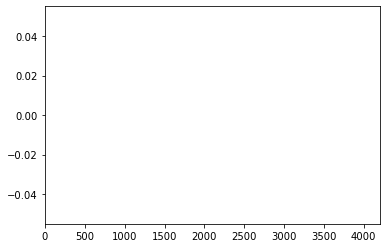

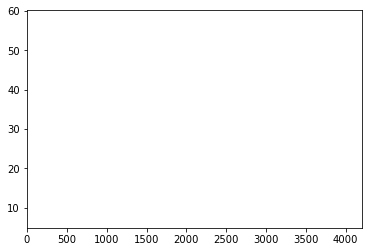

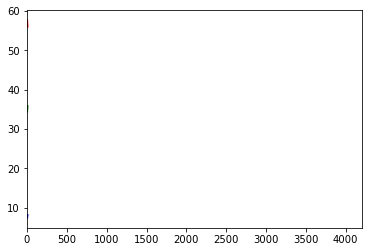

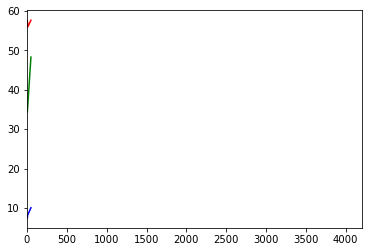

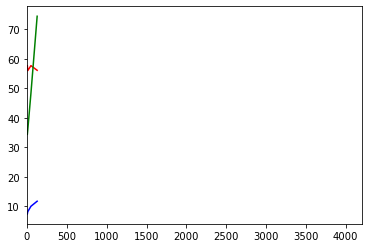

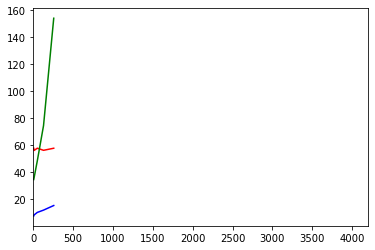

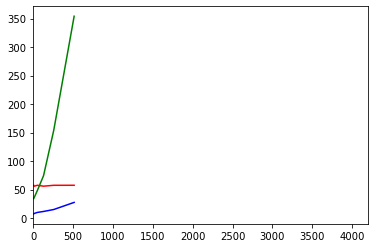

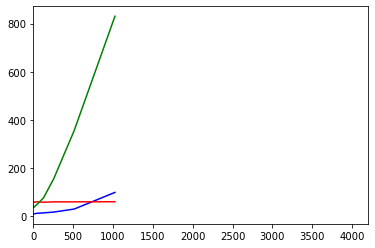

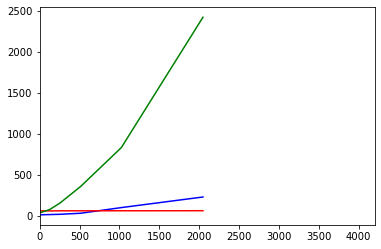

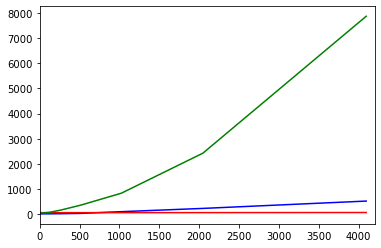

In [31]:
import matplotlib.pyplot as plt 

for i in range(len(neurons) + 1 ):
    plt.xlim(0,4200)
    plt.plot(neurons[:i], mac_times[:i], 'b')
    plt.plot(neurons[:i], frodo_times[:i], 'r')
    plt.plot(neurons[:i], pi_times[:i], 'g')
    plt.show()
